In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from typing import Literal
import numpy as np
import os
import sys
sys.path.append("../") # Where to find utilssphering
import utilssphering
import seaborn as sns

In [3]:
match_rep_df = pd.read_csv("../checkpoints/match_rep_df.csv")

match_rep_df = match_rep_df[match_rep_df["sphering"] == True]

match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Size_MB_std,sphering,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.000144,True,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.000183,True,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.000142,True,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
6,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.000114,True,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841
8,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.000153,True,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.000044,True,0.174914,57.777778,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",23.255814,0.244983,544244
354,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.000044,True,0.157136,60.000000,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.227059,543826
356,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.000583,True,0.179268,58.888889,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.253483,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.000014,True,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567


In [5]:
def calculate_pval_proportion(dataframe: pd.DataFrame, pval_threshold: float = 0.05, ref_non_rep: Literal["rep", "non_rep"] = "non_rep"):
    """For a given DataFrame, calculate the proportion above the pvalue
    threshold"""
    # mean_ap_col = f"sim_retrieval_average_precision_{ref_non_rep}_i_mean_i"
    mean_ap_pval_col = f"sim_retrieval_average_precision_{ref_non_rep}_i_nlog10qvalue_mean_i"

    pval_threshold = -math.log10(pval_threshold)

    return (dataframe[mean_ap_pval_col] > pval_threshold).sum() / len(dataframe[mean_ap_pval_col])

def get_evalzoo_metrics(row, evalzoo_dir: str = "results/results", ref_non_rep: Literal["rep", "non_rep"] = "non_rep"):
    evalzoo_metric_path = os.path.join(evalzoo_dir, row["Batch"]+"_"+ref_non_rep, f"metrics_level_1_{ref_non_rep}.parquet")
    evalzoo_metric_df = pd.read_parquet(evalzoo_metric_path)
    # Subset for the specific plate of a given row
    evalzoo_metric_df = evalzoo_metric_df[evalzoo_metric_df["Metadata_Plate"] == row["Assay_Plate_Barcode"]]

    return calculate_pval_proportion(evalzoo_metric_df, pval_threshold=0.05, ref_non_rep=ref_non_rep)


match_rep_df["ref_score"] = match_rep_df.apply(get_evalzoo_metrics, ref_non_rep="ref", axis=1)
match_rep_df["non_rep_score"] = match_rep_df.apply(get_evalzoo_metrics, ref_non_rep="non_rep", axis=1)

            

In [6]:
match_rep_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,value_95_replicating,Percent_Replicating,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count,ref_score,non_rep_score
0,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Widefield,4,NaN,1,10,6,...,0.191908,60.000000,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937,0.500000,0.000000
2,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,10,6,...,0.269617,62.222222,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350,0.500000,0.000000
4,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,10,6,...,0.205121,66.666667,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443,0.566667,0.186047
6,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,20,6,...,0.182630,57.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.279178,527841,0.444444,0.093023
8,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Widefield,9,NaN,1,20,6,...,0.184205,67.777778,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.291127,1101611,0.566667,0.212766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,4.0,1,20,5,...,0.174914,57.777778,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",23.255814,0.244983,544244,0.377778,0.063830
354,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,4.0,1,20,5,...,0.157136,60.000000,"AGP, DNA, ER, Mito, RNA",NaN,"AGP, DNA, ER, Mito, RNA",20.930233,0.227059,543826,0.444444,0.139535
356,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,4.0,1,20,6,...,0.179268,58.888889,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.253483,489099,0.300000,0.093023
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,4.0,1,20,6,...,0.139090,56.666667,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567,0.277778,0.093023


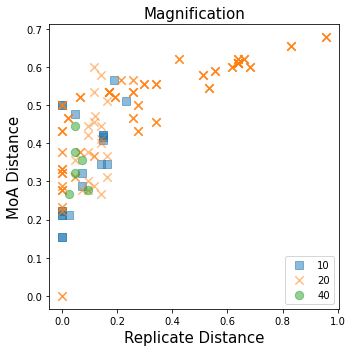

In [13]:
# A

group = "Magnification"

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) #&
                        # (~match_rep_df["Batch"].str.contains("siteSub")) 
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df_subset, 
    x="non_rep_score", 
    y="ref_score", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True,
    legend_location="lower right",
    alpha=0.5,
    use_markers=True,
    s=70,
    # x_lim=[16,26],
    # y_lim=[38,70],
    xlabel="Replicate Distance",
    ylabel="MoA Distance"
    )

# fig.savefig("(A)-rep-vs-match-mag.png", dpi=300)


In [ ]:
# Plotting on non-aggregated distributions

CP_Broad_Phenix_C_BIN1_P1


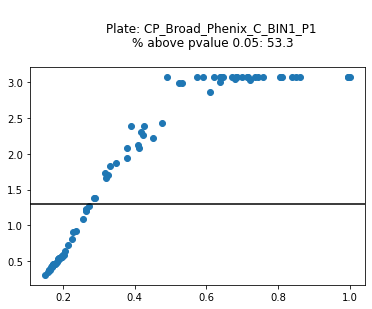

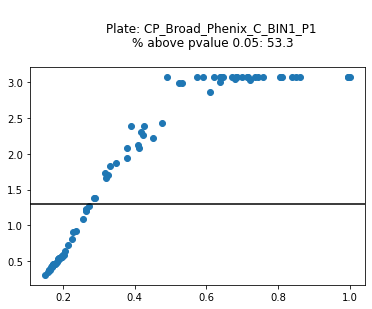

In [24]:


def plot_evalzoo_plate(dataframe: pd.DataFrame, ref_non_rep: Literal["rep", "non_rep"] = "non_rep", plot_proportion: bool = True, pval_threshold: float = 0.05):
    mean_ap_col = f"sim_retrieval_average_precision_{ref_non_rep}_i_mean_i"
    mean_ap_pval_col = f"sim_retrieval_average_precision_{ref_non_rep}_i_nlog10qvalue_mean_i"

    pval_proportion = calculate_pval_proportion(dataframe, pval_threshold=pval_threshold, ref_non_rep=ref_non_rep) * 100

    fig, ax = plt.subplots()

    ax.scatter(dataframe[mean_ap_col], dataframe[mean_ap_pval_col])
    ax.axhline(y=-math.log10(pval_threshold), color="black")
    ax.set_title(f"""
        Plate: {dataframe["Metadata_Plate"][0]} 
        % above pvalue 0.05: {round(pval_proportion, 1)}
    """)
    fig.set_facecolor("white")

    return fig

# df = pd.read_parquet("/Users/ctromans/Desktop/input/results/results/5673b72b/metrics_level_1_non_rep.parquet")
df = pd.read_parquet("/Users/ctromans/Desktop/input/results/results/8224e52e/metrics_level_1_ref.parquet")

plate = df["Metadata_Plate"].tolist()[0]

print(plate)

sub_df = df[df["Metadata_Plate"] == plate]

calculate_pval_proportion(sub_df, ref_non_rep="ref")

plot_evalzoo_plate(sub_df, ref_non_rep="ref")

In [ ]:
def plot_pval_ap_line(dataframe: pd.DataFrame, ref_non_rep: Literal["rep", "non_rep"] = "non_rep", ax = None, plot_proportion: bool = True, pval_threshold: float = 0.05):
    return 1


# Have an ax object to contain each of the lines
fig, ax = plt.subplots()

for plate in df:

    plot_pval_ap_line


For each batch we have a non_rep and a ref parquet file. Within this file exists the data for multiple plates. Now, we want to try and combine all of this data into one parquet file, across all vendors. To differentiate between ref and non_ref, we'll add a new column to the dataframe: metric_type, which will contain the levels "ref" and "non_rep". To the same dataframe we will also add a column for the batch and the vendor, that will allow us to subset later

1. Iterate through match_rep_df and load the corresponding ref and non_rep metrics
2. Combine metrics into a new dataframe with the vendor, batch, and metric_type columns
3. Repeat for all rows



In [23]:
t = pd.read_parquet("results/results/Scope1_MolDev_10X_ref/")

# t.columns = [str(col) + "_TEST" for col in t.columns if "sim" in col]


t.rename(lambda x: x+"_TEST" if "sim_" in x else x, axis=1)

,Metadata_pert_iname,Metadata_reference_or_other,Metadata_Plate,sim_scaled_mean_ref_i_mean_i_TEST,sim_scaled_mean_ref_i_median_i_TEST,sim_scaled_median_ref_i_mean_i_TEST,sim_scaled_median_ref_i_median_i_TEST,sim_ranked_relrank_mean_ref_i_mean_i_TEST,sim_ranked_relrank_mean_ref_i_median_i_TEST,sim_ranked_relrank_median_ref_i_mean_i_TEST,...,sim_stat_signal_n_ref_i_median_i_TEST,sim_stat_background_n_ref_i_mean_i_TEST,sim_stat_background_n_ref_i_median_i_TEST,sim_retrieval_average_precision_ref_i_mean_i_TEST,sim_retrieval_average_precision_ref_i_median_i_TEST,sim_retrieval_r_precision_ref_i_mean_i_TEST,sim_retrieval_r_precision_ref_i_median_i_TEST,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i_TEST,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i_TEST,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i_TEST
0,A-366,pert,Plate2_PCO_6ch_4site_10XPA,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,0.533854,...,7.0,48.0,48.0,0.164346,0.153485,0.107143,0.142857,0.333687,0.277463,0.308864
1,A-366,pert,Plate3_PCO_6ch_4site_10XPA_Crest,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,0.533854,...,7.0,48.0,48.0,0.164346,0.153485,0.107143,0.142857,0.333687,0.277463,0.308864
2,ABT-737,pert,Plate2_PCO_6ch_4site_10XPA,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,0.101562,...,7.0,48.0,48.0,0.554780,0.578962,0.428571,0.571429,2.727806,3.008908,2.293433
3,ABT-737,pert,Plate3_PCO_6ch_4site_10XPA_Crest,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,0.101562,...,7.0,48.0,48.0,0.554780,0.578962,0.428571,0.571429,2.727806,3.008908,2.293433
4,AMG-925,pert,Plate2_PCO_6ch_4site_10XPA,2.544456,2.651249,2.358491,2.587136,0.101935,0.093750,0.088542,...,7.0,48.0,48.0,0.707481,0.768701,0.589286,0.714286,3.290924,4.000043,2.591954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,skepinone-l,pert,Plate3_PCO_6ch_4site_10XPA_Crest,1.275971,1.547769,1.483524,1.929239,0.191964,0.183036,0.119792,...,7.0,48.0,48.0,0.505619,0.486557,0.392857,0.571429,2.572278,2.322893,2.177323
176,valrubicin,pert,Plate2_PCO_6ch_4site_10XPA,4.724061,5.607561,4.530161,5.252351,0.049107,0.020833,0.059896,...,7.0,48.0,48.0,0.860989,1.000000,0.767857,1.000000,3.825301,4.000043,2.736706
177,valrubicin,pert,Plate3_PCO_6ch_4site_10XPA_Crest,4.724061,5.607561,4.530161,5.252351,0.049107,0.020833,0.059896,...,7.0,48.0,48.0,0.860989,1.000000,0.767857,1.000000,3.825301,4.000043,2.736706
178,veliparib,pert,Plate2_PCO_6ch_4site_10XPA,0.376637,0.406893,0.043987,-0.125647,0.406622,0.392857,0.375000,...,7.0,48.0,48.0,0.239478,0.237570,0.178571,0.142857,0.736744,0.703664,0.588681


In [70]:
def combine_evalzoo_metrics(match_rep_df: pd.DataFrame, evalzoo_dir: str = "results/results"):
    # Add Batch and Metadata_Plate since we need to check the presence of a
    # string in them later, and you can't check them if they don't exist
    output_df = pd.DataFrame({"Batch": [], "Metadata_Plate": []})
    for ind, row in match_rep_df.iterrows():
        # Need to do some check that this row has not already been processed (so
        # we don't add it twice)
        if not (row["Batch"] in output_df["Batch"].values and row["Assay_Plate_Barcode"] in output_df["Metadata_Plate"].values):
            ref_metric_path = os.path.join(evalzoo_dir, row["Batch"]+"_ref", f"metrics_level_1_ref.parquet")
            non_rep_metric_path = os.path.join(evalzoo_dir, row["Batch"]+"_non_rep", f"metrics_level_1_non_rep.parquet")

            ref_metric_df = pd.read_parquet(ref_metric_path)
            non_rep_metric_df = pd.read_parquet(non_rep_metric_path)

            # Since we are going to use the metric_type to differentiate between ref
            # and non_rep, remove this information from the feature names
            # ref_metric_df = ref_metric_df.rename(lambda x: x + "_ref" if "sim_" in x else x, axis=1)
            # non_rep_metric_df = non_rep_metric_df.rename(lambda x: x + "_non_rep" if "sim_" in x else x, axis=1)

            # Add cols
            ref_metric_df["Vendor"], ref_metric_df["Batch"], ref_metric_df["metric_type"] = row["Vendor"], row["Batch"], "ref"
            non_rep_metric_df["Vendor"], non_rep_metric_df["Batch"], non_rep_metric_df["metric_type"] = row["Vendor"], row["Batch"], "non_rep"

            output_df = pd.concat([output_df, ref_metric_df, non_rep_metric_df], axis=0)

    return output_df

evalzoo_combined = combine_evalzoo_metrics(match_rep_df)
evalzoo_combined

/var/folders/rw/691cc6h16f9cfxlh9g6bpq400000gq/T/ipykernel_90278/4287263452.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not (row["Batch"] in output_df["Batch"].values and row["Assay_Plate_Barcode"] in output_df["Metadata_Plate"].values):


,Batch,Metadata_Plate,Metadata_pert_iname,Metadata_reference_or_other,sim_scaled_mean_ref_i_mean_i,sim_scaled_mean_ref_i_median_i,sim_scaled_median_ref_i_mean_i,sim_scaled_median_ref_i_median_i,sim_ranked_relrank_mean_ref_i_mean_i,sim_ranked_relrank_mean_ref_i_median_i,...,sim_stat_signal_n_non_rep_i_median_i,sim_stat_background_n_non_rep_i_mean_i,sim_stat_background_n_non_rep_i_median_i,sim_retrieval_average_precision_non_rep_i_mean_i,sim_retrieval_average_precision_non_rep_i_median_i,sim_retrieval_r_precision_non_rep_i_mean_i,sim_retrieval_r_precision_non_rep_i_median_i,sim_retrieval_average_precision_non_rep_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_non_rep_i_nlog10pvalue_median_i,sim_retrieval_average_precision_non_rep_i_nlog10qvalue_mean_i
0,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,A-366,pert,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,A-366,pert,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,ABT-737,pert,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,ABT-737,pert,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,AMG-925,pert,2.544456,2.651249,2.358491,2.587136,0.101935,0.093750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,NaN,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.027253,0.027253,0.0,0.0,0.406356,0.406356,0.126677
39,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,NaN,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.023998,0.023998,0.0,0.0,0.308816,0.308816,0.090321
40,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,NaN,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.013140,0.013140,0.0,0.0,0.087009,0.087009,0.055154
41,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,NaN,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.018905,0.018905,0.0,0.0,0.212973,0.212973,0.063732


In [71]:
evalzoo_combined.to_parquet("evalzoo_metrics_combined.paraquet", index=False)
evalzoo_combined = pd.read_parquet("evalzoo_metrics_combined.paraquet")
evalzoo_combined

,Batch,Metadata_Plate,Metadata_pert_iname,Metadata_reference_or_other,sim_scaled_mean_ref_i_mean_i,sim_scaled_mean_ref_i_median_i,sim_scaled_median_ref_i_mean_i,sim_scaled_median_ref_i_median_i,sim_ranked_relrank_mean_ref_i_mean_i,sim_ranked_relrank_mean_ref_i_median_i,...,sim_stat_signal_n_non_rep_i_median_i,sim_stat_background_n_non_rep_i_mean_i,sim_stat_background_n_non_rep_i_median_i,sim_retrieval_average_precision_non_rep_i_mean_i,sim_retrieval_average_precision_non_rep_i_median_i,sim_retrieval_r_precision_non_rep_i_mean_i,sim_retrieval_r_precision_non_rep_i_median_i,sim_retrieval_average_precision_non_rep_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_non_rep_i_nlog10pvalue_median_i,sim_retrieval_average_precision_non_rep_i_nlog10qvalue_mean_i
0,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,A-366,pert,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,A-366,pert,0.017355,0.034813,-0.152331,-0.183784,0.505952,0.531250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,ABT-737,pert,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,ABT-737,pert,1.550364,1.901986,1.559669,1.654185,0.158854,0.126488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,AMG-925,pert,2.544456,2.651249,2.358491,2.587136,0.101935,0.093750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.027253,0.027253,0.0,0.0,0.406356,0.406356,0.126677
24636,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.023998,0.023998,0.0,0.0,0.308816,0.308816,0.090321
24637,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.013140,0.013140,0.0,0.0,0.087009,0.087009,0.055154
24638,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,None,pert,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,88.0,88.0,0.018905,0.018905,0.0,0.0,0.212973,0.212973,0.063732


In [73]:
[i for i in evalzoo_combined.columns if "sim_retrieval_average_precision_i_mean_i" in i]

[]

ValueError: Could not interpret input 'sim_retrieval_average_precision_i_mean_i'

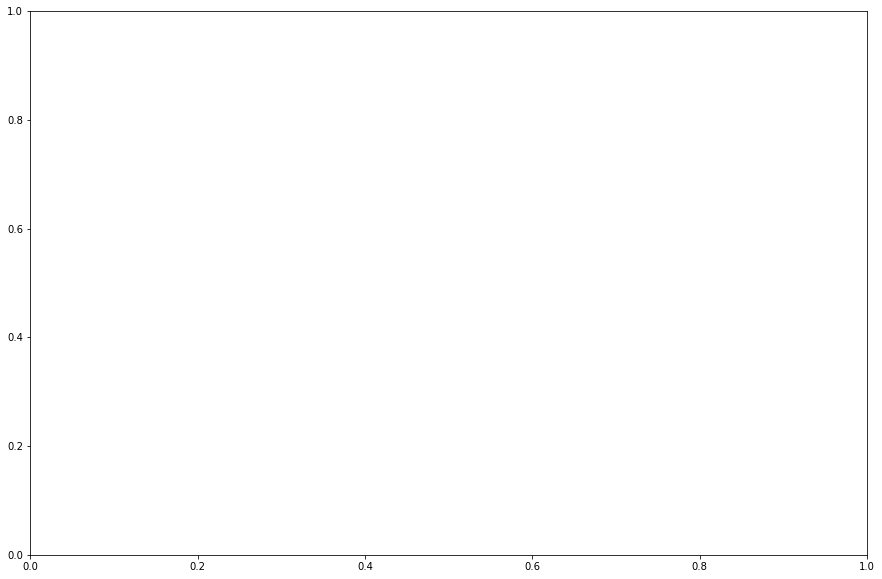

In [72]:
subset = evalzoo_combined[evalzoo_combined["Vendor"] == "Nikon"]

fig, ax = plt.subplots(figsize=(15, 10))

sns.violinplot(data=subset, x="Metadata_Plate", y="sim_retrieval_average_precision_i_mean_i", hue="metric_type", split=True, ax=ax)

<AxesSubplot:xlabel='sim_retrieval_average_precision_i_mean_i', ylabel='Count'>

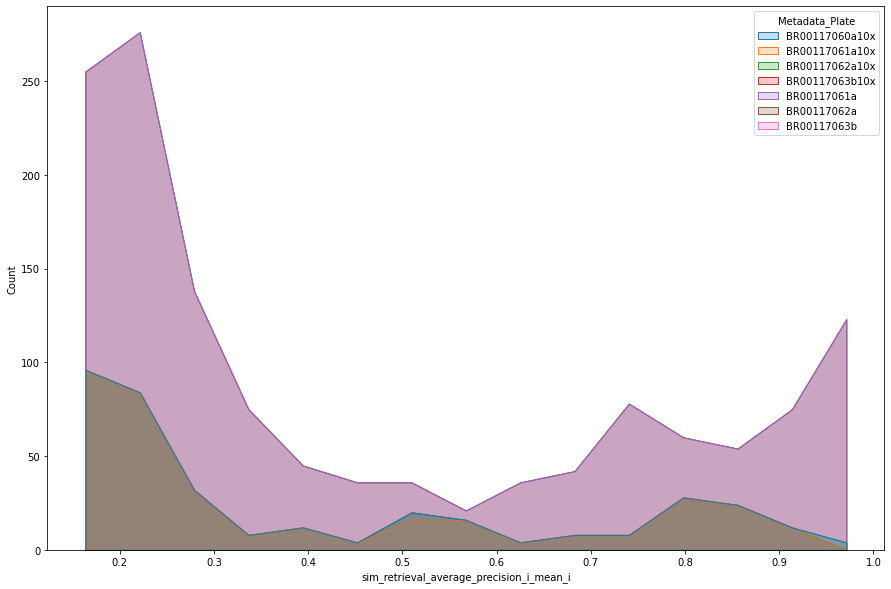

In [83]:
subset = evalzoo_combined[
        (evalzoo_combined["Vendor"] == "Nikon") 
        & (evalzoo_combined["metric_type"] == "ref")
]

fig, ax = plt.subplots(figsize=(15, 10))

# sns.violinplot(data=subset, x="Metadata_Plate", y="sim_retrieval_average_precision_i_mean_i", hue="metric_type", split=True, ax=ax)

sns.histplot(subset, x="sim_retrieval_average_precision_i_mean_i", hue="Metadata_Plate", element="poly", ax=ax)